In [13]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
import pandas as pd
import tensorflow as tf
import os

matplotlib.rcParams.update({'font.size': 12})

# Load Ising model data set

In [14]:
# load data
L = 10
N = L*L

datadir = "/Users/aormorningstar/Documents/PSI/Essay/data/data_N="+str(N)+"/" 
file_list = sort(os.listdir(datadir))
file_list = file_list[1:]

num_per_temp = 5000
num_input = N

# amount of data devoted to training and testing
test_fraction = 0.33
num_test_per_temp = int(test_fraction * num_per_temp)
num_train_per_temp = num_per_temp - num_test_per_temp

# containers for training and testing data
data = empty((0,N))
data_test = empty((0,N))
targets = empty((0,1))
targets_test = empty((0,1))

file_interval = 1
temps = []
mags = []
chis = []
for fname in file_list[::file_interval]:
    # parse file name, ex: states_N=100_T=1.500000.csv
    T = float(fname.split('=')[-1][0:8])
    
    # read in data
    data_T = pd.read_csv(datadir+fname,delimiter=',',header=None,nrows=num_per_temp).values
    
    # shuffle data and create targets
    num_data_T = data_T.shape[0]
    shuffled_indices_T = random.choice(num_data_T, num_data_T, replace=False)
    data_T = data_T[shuffled_indices_T]
    targets_T = np.full((num_per_temp,1),T)
    
    # allocate training and testing data
    data = vstack((data, data_T[0:num_train_per_temp,:]))
    targets = vstack((targets,targets_T[0:num_train_per_temp,:]))
    data_test = vstack((data_test, data_T[num_train_per_temp:,:]))
    targets_test = vstack((targets_test,targets_T[num_train_per_temp:,:]))
    
    # compute magnetization and variance of magnetization
    m_T_list = abs(mean(data_T*2-1, axis=1))
    mSqrd_T_list = m_T_list**2
    m_T = mean(m_T_list)
    chi_T = N*(mean(mSqrd_T_list) - m_T**2)/T
    mags += [m_T]
    chis += [chi_T]
    temps += [T]

# standardize targets
targets = (targets - min(temps))/max(temps)
targets_test = (targets_test - min(temps))/max(temps)

In [15]:
mags = array(mags)
chis = array(chis)
temps = array(temps)
num_temps = len(temps)
num_test = data_test.shape[0]

# shuffle training data and targets (in the same way as to keep pairing)
num_data = data.shape[0]
shuffled_indices = random.choice(num_data, num_data, replace=False)
data = data[shuffled_indices]
targets = targets[shuffled_indices]

# Plot Measurements

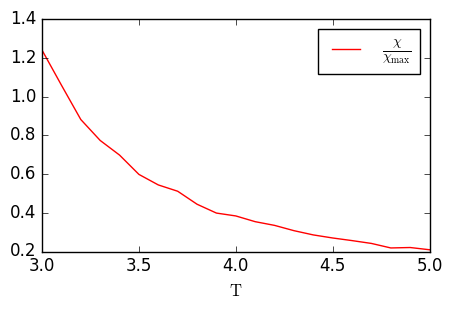

In [16]:
ax_meas = figure(figsize=(5,3)).add_subplot(111)
#ax_meas.plot(temps, mags_slope,'b-',label='$\Delta |M|$')
ax_meas.plot(temps, chis,'r-',label=r'$\frac{\chi}{\chi_{\mathrm{max}}}$')
ax_meas.set_xlabel(r'$\mathrm{T}$')
ax_meas.legend()
show()

In [17]:
# compare across L
chis_5 = np.array([ 0.00164925,  0.0029804 ,  0.00648926,  0.01017848,  0.01689278,
        0.03351175,  0.0392844 ,  0.07318075,  0.09418303,  0.18399042,
        0.23343232,  0.33929181,  0.43884892,  0.57097679,  0.63039892,
        0.69281197,  0.71949997,  0.75570604,  0.74655455,  0.69231661,
        0.66715999,  0.62338051,  0.57282013,  0.54657939,  0.49683765,
        0.47863518,  0.4225239 ,  0.41278605,  0.37067789,  0.35292199,
        0.31407094,  0.2991587 ,  0.29605598,  0.27236802,  0.25747942,
        0.23563634,  0.23595707,  0.22231877,  0.20602253,  0.19098793,
        0.18857771])
chis_10 = np.array([  1.69077760e-03,   3.22147491e-03,   6.92571200e-03,
         1.05063582e-02,   1.76952503e-02,   2.61870933e-02,
         4.47383840e-02,   6.93348104e-02,   1.37307659e-01,
         1.92581157e-01,   3.42392739e-01,   6.90915020e-01,
         1.28669432e+00,   1.90907977e+00,   2.46862232e+00,
         2.55125703e+00,   2.31485475e+00,   2.08191773e+00,
         1.72529322e+00,   1.43815066e+00,   1.22556693e+00,
         1.04205357e+00,   8.81618038e-01,   7.77168405e-01,
         6.90021715e-01,   5.81830764e-01,   5.17227198e-01,
         5.11129365e-01,   4.59724967e-01,   3.92126981e-01,
         3.95523230e-01,   3.50281047e-01,   3.34831389e-01,
         3.00526525e-01,   2.88970961e-01,   2.73647415e-01,
         2.60024548e-01,   2.35525779e-01,   2.12216667e-01,
         2.20205093e-01,   2.09957248e-01])
chis_15 = np.array([  1.46939449e-03,   3.52893156e-03,   5.89088948e-03,
         1.11687658e-02,   1.58286507e-02,   2.61072119e-02,
         4.14588729e-02,   6.60248696e-02,   1.19298483e-01,
         1.88063401e-01,   4.28655309e-01,   9.04917549e-01,
         2.10667623e+00,   4.29762983e+00,   5.42535531e+00,
         4.60515668e+00,   3.68269034e+00,   2.68813004e+00,
         2.19080001e+00,   1.59637343e+00,   1.26731964e+00,
         1.10343122e+00,   9.77147890e-01,   7.65982578e-01,
         7.24532790e-01,   6.41604091e-01,   5.39167949e-01,
         5.07674458e-01,   4.63253034e-01,   3.83292199e-01,
         3.76928639e-01,   3.62087743e-01,   3.11817370e-01,
         3.11800946e-01,   3.05665769e-01,   2.79444060e-01,
         2.60148711e-01,   2.45469365e-01,   2.24780174e-01,
         2.10768022e-01,   2.01812182e-01])
chis_20 = np.array([  1.75052160e-03,   3.75875491e-03,   5.72066533e-03,
         1.01018326e-02,   1.71530183e-02,   2.51541163e-02,
         3.95360510e-02,   6.80610108e-02,   1.01499252e-01,
         1.93267705e-01,   4.19986480e-01,   1.01555122e+00,
         3.07285562e+00,   7.75731709e+00,   8.81415632e+00,
         6.52943040e+00,   4.45815834e+00,   3.05996952e+00,
         2.17708905e+00,   1.64105715e+00,   1.34070725e+00,
         1.16936907e+00,   9.87570737e-01,   8.15215443e-01,
         7.27794682e-01,   6.37152583e-01,   5.41383175e-01,
         4.93502829e-01,   4.43001800e-01,   4.24419431e-01,
         3.68399846e-01])

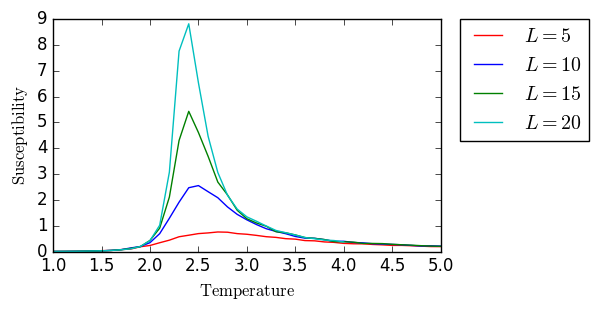

In [18]:
def compareSusc(Ls,Lists):
    tmp = np.arange(1.0,5.1,0.1)
    lns = ['r-','b-','g-','c-','k-']
    ax = figure(figsize=(5,3)).add_subplot(111)
    for i in range(len(Ls)):
        ax.plot(tmp[0:len(Lists[i])], Lists[i],lns[i],label=r'$L='+str(Ls[i])+'$')
    ax.set_xlabel(r'$\mathrm{Temperature}$')
    ax.set_ylabel(r'$\mathrm{Susceptibility}$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xlim([min(tmp),max(tmp)])
    #ax.set_ylim([0.0,max(Lists[0])])
    return ax

compareSusc([5,10,15,20],[chis_5,chis_10,chis_15,chis_20])
show()

# Build the tensor flow computational graph

In [19]:
# initialize weight variables to random values
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# initialize bias variables to random values
def bias_variable(shape):
    initial = tf.constant(0.0, shape=shape)
    return tf.Variable(initial)

# define placeholders to feed the data into
x  = tf.placeholder(tf.float32, [None, num_input])
y_ = tf.placeholder(tf.float32, [None, 1])

# define the network's architecture and training hyper parameters
num_hidden_01 = N
#num_hidden_02 = N
num_output = 1
reg = 0.0 #!NOTE! commented out regularization
learning_rate = 0.01
num_epochs = 250
mini_batch_size = 100
mini_batch_num  = (num_train_per_temp*num_temps)//mini_batch_size

# first hidden layer
W_1  = weight_variable([num_input, num_hidden_01])
b_1  = bias_variable([num_hidden_01])
O_1  = tf.nn.softplus(tf.matmul(x, W_1)+b_1)

# second hidden layer
# W_2  = weight_variable([num_hidden_01, num_hidden_02])
# b_2  = bias_variable([num_hidden_02])
# O_2  = tf.nn.softplus(tf.matmul(O_1, W_2)+b_2)

# output layer
W_o = weight_variable([num_hidden_01, num_output])
b_o = bias_variable([num_output])
y = tf.nn.softplus(tf.matmul(O_1, W_o)+b_o)

# operator used to initialize weights and biases
init_op = tf.global_variables_initializer()

# use the squared error loss function with a L2 regularization
regularized_error = tf.divide(tf.nn.l2_loss(y_-y),mini_batch_size) #+ reg*(tf.nn.l2_loss(W_1)+tf.nn.l2_loss(W_o))

# use the gradient descent as an minimization procedure
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(regularized_error)
# training_step = tf.train.AdamOptimizer(learning_rate).minimize(regularized_error)

# define the error operator used to evaluate the network's performance
error = tf.nn.l2_loss(y_-y)

# Train Network

In [20]:
# start session and initialize variables
sess = tf.InteractiveSession()
sess.run(init_op)

# data containers for holding training errors
error_list = []
epoch_list = []

# train
for epoch in range(num_epochs):
    # track error on test data
    epoch_error = sess.run(error, feed_dict={x: data_test, y_:targets_test})/(num_test_per_temp*num_temps)
    error_list += [epoch_error]
    epoch_list += [epoch]
    print('epoch ',epoch,' epoch error ',epoch_error,end='\r')
    
    # shuffle training data
    shuf = random.choice(num_data, num_data, replace=False)
    data = data[shuf]
    targets = targets[shuf]
    
    # initialize location of mini batch
    mini_batch_start = 0
    mini_batch_end = mini_batch_size
    
    # train by running through mini batches
    for i in range(0, mini_batch_num):
        sess.run(training_step, feed_dict={x: data[mini_batch_start:mini_batch_end,:], y_: targets[mini_batch_start:mini_batch_end,:]})
        
        # push batch location forward
        mini_batch_start += mini_batch_size
        mini_batch_end += mini_batch_size

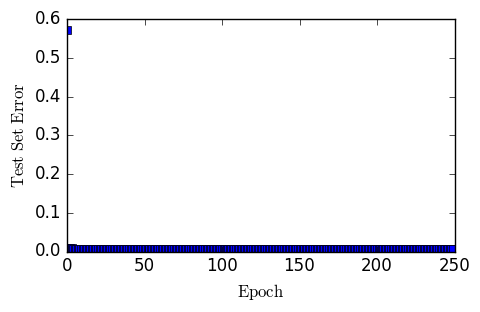

Final test set error =  0.00722659288547


In [21]:
# plot error on testing set as the model learns
ax = figure(figsize=(5,3)).add_subplot(111)
ax.plot(epoch_list, error_list,color='blue', ls='',marker='s')
ax.set_ylabel(r'$\mathrm{Test\ Set\ Error}$')
ax.set_xlabel(r'$\mathrm{Epoch}$')
show()
print('Final test set error = ',error_list[-1])

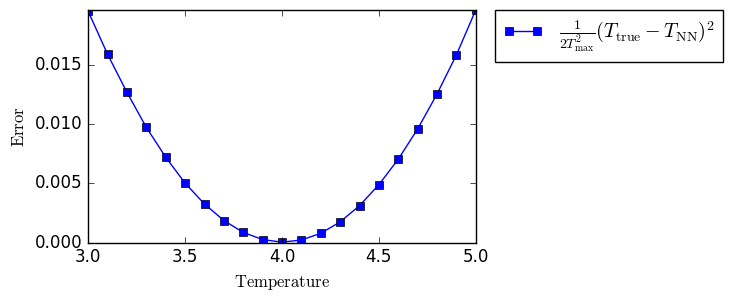

In [22]:
# compute error as a function of temperature
error_list_T = np.zeros(num_temps)

for i,T in enumerate(temps):
    # test set for temperature T
    begin = i*num_test_per_temp
    end = (i+1)*num_test_per_temp
    # compute error
    error_T = sess.run(error, feed_dict={x: data_test[begin:end,:], y_:targets_test[begin:end,:]})/num_test_per_temp
    error_list_T[i] = error_T

# plot errors and temperatures
ax_T = figure(figsize=(5,3)).add_subplot(111)
ax_T.plot(temps, error_list_T, color='blue', label=r'$\frac{1}{2 T^2_{\mathrm{max}}}(T_{\mathrm{true}}-T_{\mathrm{NN}})^2$', marker='s')
ax_T.set_ylabel(r'$\mathrm{Error}$')
ax_T.set_xlabel(r'$\mathrm{Temperature}$')
ax_T.set_ylim([0.0,max(error_list_T)])
ax_T.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

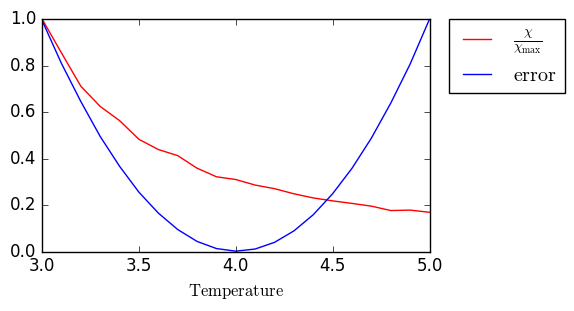

In [23]:
# plot measurements and model error
ax_comb = figure(figsize=(5,3)).add_subplot(111)
#ax_comb.plot(temps, mags_slope,'g-',label='$\Delta |M|$')
ax_comb.plot(temps, chis/max(chis),'r-',label=r'$\frac{\chi}{\chi_{\mathrm{max}}}$')
ax_comb.plot(temps, error_list_T/max(error_list_T), 'b-',label=r'$\mathrm{error}$')
ax_comb.set_xlabel(r'$\mathrm{Temperature}$')
ax_comb.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

# Compare Runs

In [26]:
# compare errors across values of L
def compareErrors(Ls,errLists):
    tmp = np.arange(1.0,5.1,0.1)
    lns = ['r-','b-','g-','c-','k-']
    ax = figure(figsize=(5,3)).add_subplot(111)
    for i in range(len(Ls)):
        ax.plot(tmp[0:len(errLists[i])], errLists[i],lns[i],label=r'$L='+str(Ls[i])+'$')
    ax.set_xlabel(r'$\mathrm{Temperature}$')
    ax.set_ylabel(r'$\mathrm{Error}$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xlim([min(tmp),max(tmp)])
    ax.set_ylim([0.0,max(errLists[0])])
    return ax

In [24]:
error_list_T

array([ 0.01929649,  0.01586123,  0.01267096,  0.00978812,  0.00748517,
        0.00569111,  0.00438829,  0.00371882,  0.00307497,  0.00368546,
        0.00434136,  0.00474351,  0.00639817,  0.0086325 ,  0.00994352,
        0.01142714,  0.01179028,  0.01233912,  0.01245782,  0.01209675,
        0.01163838,  0.0107838 ,  0.0098975 ,  0.00908426,  0.00821933,
        0.00772968,  0.00686142,  0.00662255,  0.00622598,  0.00673145,
        0.00675241,  0.00780362,  0.00882861,  0.01014469,  0.01253039,
        0.01393598,  0.01616055,  0.01943517,  0.02194867,  0.02529937,
        0.02923282])

In [17]:
"""
num_per_temp = 1000
L = 5,10,15
num_hidden_01 = N
num_output = 1
reg = 0.001
learning_rate = 0.00003,0.00001,0.00001
num_epochs = 250
mini_batch_size = 100
"""
err_5 = np.array([ 0.57071855,  0.50098901,  0.43406464,  0.37071043,  0.31119331,
        0.25763311,  0.20881641,  0.19791419,  0.18801047,  0.22609647,
        0.24263087,  0.29169549,  0.32520229,  0.36745415,  0.38565866,
        0.4065441 ,  0.40848577,  0.41923614,  0.4087216 ,  0.39489885,
        0.39457132,  0.37797154,  0.3634129 ,  0.37866225,  0.38140196,
        0.39775025,  0.41046207,  0.44977598,  0.48639679,  0.5339684 ,
        0.56623047])
err_10 = np.array([ 0.39254144,  0.32500038,  0.25982632,  0.19581639,  0.14082618,
        0.0925471 ,  0.07914365,  0.09845085,  0.1392543 ,  0.17455985,
        0.20771636,  0.25447818,  0.29697513,  0.33385733,  0.35910153,
        0.3774035 ,  0.37050025,  0.35439629,  0.32247381,  0.2803383 ,
        0.24415082,  0.20316114,  0.17189668,  0.15445929,  0.15887092,
        0.1783125 ,  0.22096907,  0.28052155,  0.33735515,  0.39455362,
        0.46249942])
err_15 = np.array([ 0.33932432,  0.27285386,  0.20805288,  0.1448701 ,  0.0876956 ,
        0.05264944,  0.07199488,  0.10839104,  0.1492834 ,  0.18415984,
        0.21104088,  0.23437791,  0.26100313,  0.31405458,  0.36750663,
        0.37522222,  0.36834189,  0.34426936,  0.30051621,  0.25013997,
        0.20267609,  0.15168882,  0.11624753,  0.10263715,  0.13100763,
        0.17774035,  0.22894176,  0.28340715,  0.35773358,  0.4160289 ,
        0.48366897])
err_20 = np.array([ 0.32201218,  0.25378179,  0.18554298,  0.12024195,  0.06544302,
        0.03513898,  0.07018595,  0.11672439,  0.15913409,  0.18545969,
        0.21180913,  0.21453092,  0.21893597,  0.27266428,  0.32953419,
        0.37281617,  0.34681337,  0.33160304,  0.29047865,  0.24363372,
        0.20344611,  0.1628296 ,  0.1280769 ,  0.11779267,  0.13885178,
        0.17829654,  0.23798951,  0.28686169,  0.34463631,  0.40629413,
        0.46811678])

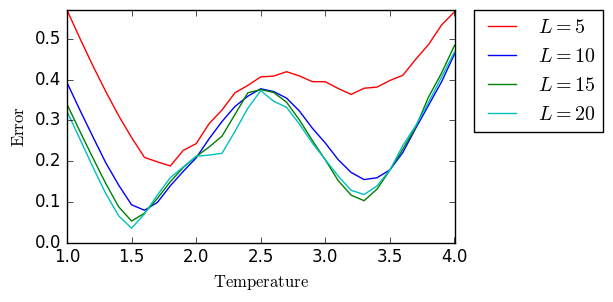

In [18]:
ax_1 = compareErrors([5,10,15,20],[err_5,err_10,err_15,err_20])
show()

In [26]:
"""
num_per_temp = 1000
L = 5,10,15
num_hidden_01 = N
num_hidden_02 = N
num_output = 1
reg = 0.0
learning_rate = 0.00003,0.00001,0.00001
num_epochs = 250
mini_batch_size = 100
"""
err_5_2 = np.array([ 0.58084374,  0.51099776,  0.44188281,  0.37700963,  0.31813241,
        0.26371854,  0.22943073,  0.21154962,  0.19940082,  0.2181113 ,
        0.23891457,  0.2805233 ,  0.31593785,  0.36069103,  0.38421554,
        0.40046981,  0.40980954,  0.41617694,  0.40712365,  0.40304376,
        0.40567961,  0.37496002,  0.36602734,  0.37237456,  0.39361554,
        0.39402334,  0.41138907,  0.46796208,  0.50604132,  0.54120679,
        0.57957609])
err_10_2 = np.array([ 0.37612182,  0.30672376,  0.24164888,  0.17473205,  0.11955815,
        0.06785002,  0.06753875,  0.09789971,  0.14379793,  0.18025615,
        0.21933928,  0.26550155,  0.31459185,  0.34869554,  0.3810785 ,
        0.39970601,  0.38744845,  0.36432846,  0.32759694,  0.28322532,
        0.24341379,  0.19736182,  0.16735115,  0.15329193,  0.15468561,
        0.18122706,  0.23007954,  0.28932082,  0.34597114,  0.40351213,
        0.47331572])
err_15_2 = np.array([ 0.3324007 ,  0.26493764,  0.19700896,  0.13377516,  0.0718022 ,
        0.0345788 ,  0.06626477,  0.11314299,  0.15667782,  0.19493702,
        0.22249362,  0.24332114,  0.26663411,  0.31537711,  0.35918422,
        0.37334723,  0.3671892 ,  0.34173345,  0.29532379,  0.24937683,
        0.20030227,  0.1489447 ,  0.10778173,  0.0926142 ,  0.12333933,
        0.17173702,  0.22275058,  0.28619589,  0.35118271,  0.40962605,
        0.47367568])

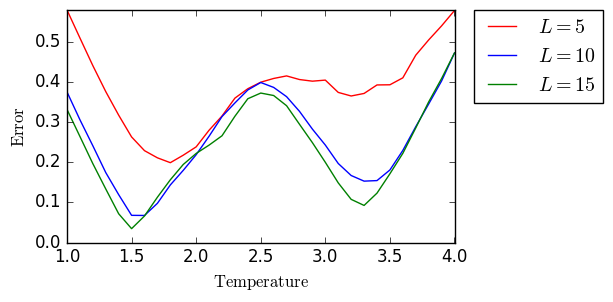

In [27]:
ax_2 = compareErrors([5,10,15],[err_5_2,err_10_2,err_15_2])
show()

In [61]:
"""
num_per_temp = 4000
L = 10
num_hidden_01 = N
num_hidden_02 = N
num_output = 1
reg = 0.0
learning_rate = 0.00001
num_epochs = 250
mini_batch_size = 100
"""
err_5_3 = np.array([ 0.56195031,  0.4944406 ,  0.42960475,  0.36708542,  0.31170548,
        0.27270233,  0.23237591,  0.23552444,  0.24534847,  0.28179259,
        0.32894207,  0.38512943,  0.43303582,  0.49231499,  0.52161106,
        0.55398448,  0.56583045,  0.57821283,  0.57928041,  0.5624086 ,
        0.54412817,  0.52486736,  0.50101545,  0.47383495,  0.44421783,
        0.42418889,  0.39626649,  0.38530669,  0.37519481,  0.37878361,
        0.37784052,  0.40277061,  0.44083102,  0.457375  ,  0.51149733,
        0.54656855,  0.59279562,  0.65036001,  0.69963609,  0.75486112,
        0.82580882])
err_10_3 = array([ 0.29781676,  0.23010148,  0.16629374,  0.10664278,  0.06449884,
        0.06608663,  0.10532516,  0.14897219,  0.19011103,  0.22413443,
        0.25200699,  0.27915887,  0.29729953,  0.3305277 ,  0.36100492,
        0.39093062,  0.40260461,  0.42557094,  0.41787769,  0.41108726,
        0.40999402,  0.38485891,  0.36910545,  0.34180344,  0.32522942,
        0.29544635,  0.27108033,  0.25381308,  0.24752501,  0.24652524,
        0.26184473,  0.27378377,  0.30636251,  0.33627761,  0.38164806,
        0.42975179,  0.47900781,  0.5299911 ,  0.57876437,  0.63950896,
        0.6947152 ])

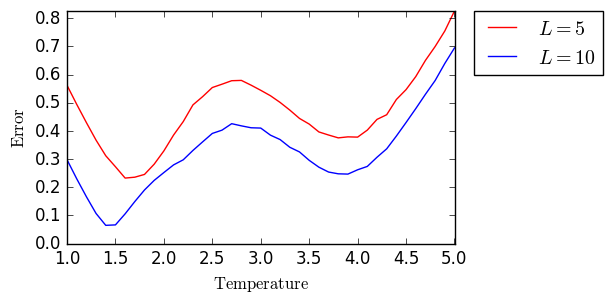

In [62]:
ax_3 = compareErrors([5,10],[err_5_3,err_10_3])
show()

In [78]:
# from here on, the targets were normalized to be in [0,1], error is averaged square difference
"""
L = 10
num_per_temp = 3000
test_fraction = 0.3
num_hidden_01 = N
num_output = 1
reg = 0.0
learning_rate = 0.0001
num_epochs = 250
mini_batch_size = 100
"""
err_5_4 = np.array([ 0.01780929,  0.01416916,  0.01119134,  0.00848699,  0.00636613,
        0.00480659,  0.0034192 ,  0.00259582,  0.00178061,  0.00249124,
        0.00273771,  0.0044802 ,  0.00568552,  0.00743546,  0.00875852,
        0.01014792,  0.01144264,  0.01145484,  0.0127082 ,  0.01085494,
        0.01120715,  0.01008209,  0.00943748,  0.00885765,  0.00793856,
        0.00751693,  0.00686609,  0.00688225,  0.00732317,  0.00737626,
        0.00708667,  0.00810202,  0.00923773,  0.01157747,  0.01215275,
        0.01550399,  0.01649472,  0.02037413,  0.02259075,  0.02623578,
        0.03050833])
err_10_4 = np.array([ 0.00764642,  0.00544199,  0.00370333,  0.0022785 ,  0.0012995 ,
        0.00059015,  0.00032469,  0.00032033,  0.00060834,  0.00104033,
        0.00162099,  0.00273316,  0.00432689,  0.00609439,  0.00821634,
        0.01022032,  0.01121903,  0.01258171,  0.01263842,  0.01125836,
        0.00981153,  0.00831034,  0.00713957,  0.00587169,  0.00494069,
        0.00343261,  0.00279842,  0.00218275,  0.0019293 ,  0.00149788,
        0.00202382,  0.00258327,  0.00308077,  0.00421188,  0.00582289,
        0.00736481,  0.01010529,  0.0123838 ,  0.01502528,  0.01906341,
        0.02258919])

In [28]:
"""
num_hidden_01 = N
num_output = 1
reg = 0.0
learning_rate = 0.005
num_epochs = 250
mini_batch_size = 100
"""
err_5_5 = np.array([ 0.01929649,  0.01586123,  0.01267096,  0.00978812,  0.00748517,
        0.00569111,  0.00438829,  0.00371882,  0.00307497,  0.00368546,
        0.00434136,  0.00474351,  0.00639817,  0.0086325 ,  0.00994352,
        0.01142714,  0.01179028,  0.01233912,  0.01245782,  0.01209675,
        0.01163838,  0.0107838 ,  0.0098975 ,  0.00908426,  0.00821933,
        0.00772968,  0.00686142,  0.00662255,  0.00622598,  0.00673145,
        0.00675241,  0.00780362,  0.00882861,  0.01014469,  0.01253039,
        0.01393598,  0.01616055,  0.01943517,  0.02194867,  0.02529937,
        0.02923282])
err_10_5 = np.array([ 0.00740391,  0.00523993,  0.0034746 ,  0.00210506,  0.00110871,
        0.00051935,  0.00024372,  0.00024464,  0.00056243,  0.00101552,
        0.00159649,  0.00264584,  0.00379354,  0.00513676,  0.00648534,
        0.00861938,  0.00898363,  0.01002336,  0.01007815,  0.00960185,
        0.00872425,  0.00774694,  0.00671116,  0.00586153,  0.00511621,
        0.00411686,  0.00317469,  0.00283688,  0.00238087,  0.00226962,
        0.00244075,  0.00284522,  0.00353585,  0.00446929,  0.00577603,
        0.007176  ,  0.00951304,  0.01197078,  0.01404448,  0.01760085,
        0.02023232])

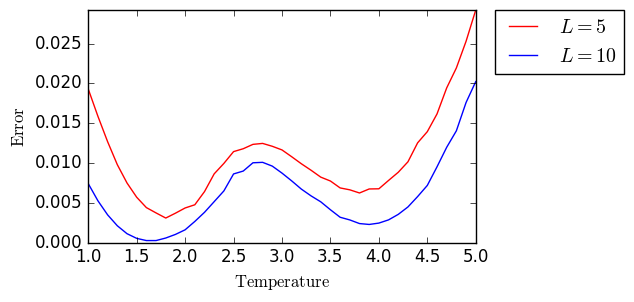

In [29]:
ax_5 = compareErrors([5,10],[err_5_5,err_10_5])
show()